In [180]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import poisson
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [181]:
data = pd.read_csv('./soccer_data.csv')

In [182]:
data.head()

,Home,Away,Home_Goals,Away_Goals
0,G-Olympus,Koban,2,3
1,Hirostar,Urawind,1,0
2,Nagomi,Shimizun,1,0
3,Savan Taurus,C-Osario,0,0
4,Sapporia,Iwana,0,0


In [183]:
home_goals_mean = data['Home_Goals'].mean()
away_goals_mean = data['Away_Goals'].mean()
print(f'Home Goals Mean: {home_goals_mean} \nAway Goals Mean: {away_goals_mean}') 

Home Goals Mean: 1.4177570093457943 
Away Goals Mean: 1.253271028037383


(0.0, 50.0)

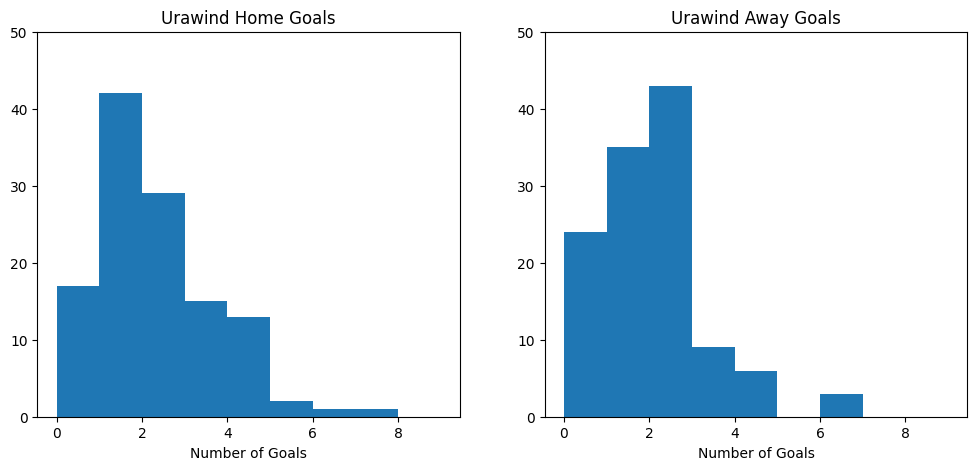

In [184]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(data.query('Home == "Urawind"')['Home_Goals'], bins=range(0, 10))
axes[0].set_title('Urawind Home Goals')
axes[0].set_xlabel('Number of Goals')
axes[0].set_ylim(0, 50)

axes[1].hist(data.query('Away == "Urawind"')['Away_Goals'], bins=range(0, 10))
axes[1].set_title('Urawind Away Goals')
axes[1].set_xlabel('Number of Goals')
axes[1].set_ylim(0, 50 )


(0.0, 50.0)

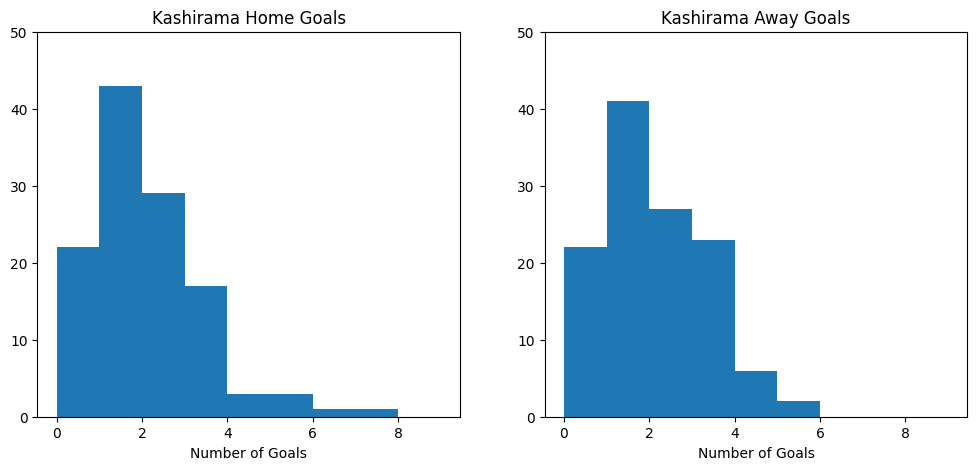

In [185]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(data.query('Home == "Kashirama"')['Home_Goals'], bins=range(0, 10))
axes[0].set_title('Kashirama Home Goals')
axes[0].set_xlabel('Number of Goals')
axes[0].set_ylim(0, 50)

axes[1].hist(data.query('Away == "Kashirama"')['Away_Goals'], bins=range(0, 10))
axes[1].set_title('Kashirama Away Goals')
axes[1].set_xlabel('Number of Goals')
axes[1].set_ylim(0, 50 )


In [186]:
model_1 = smf.glm('Home_Goals ~ Away_Goals + Home + Away', data=data, family=sm.families.Poisson()).fit()
model_2 = smf.glm('Home_Goals ~ Away_Goals', data=data, family=sm.families.Poisson()).fit()

In [187]:
print(f'model_1 AIC: {model_1.aic}')
print(f'model_2 AIC: {model_2.aic}')

model_1 AIC: 6448.857703135879
model_2 AIC: 6577.953461918313


In [188]:
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Home_Goals   No. Observations:                 2140
Model:                            GLM   Df Residuals:                     2087
Model Family:                 Poisson   Df Model:                           52
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3171.4
Date:                Mon, 15 Dec 2025   Deviance:                       2433.7
Time:                        00:20:34   Pearson chi2:                 2.13e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.1027
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [189]:
sampleData_1 = pd.DataFrame({'Away_Goals': 0, 'Home': 'Urawind', 'Away': 'Kashirama'}, index=[0])
sampleData_1

,Away_Goals,Home,Away
0,0,Urawind,Kashirama


In [190]:
pred_1 = model_1.predict(sampleData_1)
pred_1

0    1.575325
dtype: float64

In [191]:
sampleData_2 = pd.DataFrame({'Away_Goals': 2, 'Home': 'Urawind', 'Away': 'Kashirama'}, index=[0])
sampleData_2

,Away_Goals,Home,Away
0,2,Urawind,Kashirama


In [192]:
pred_2 = model_1.predict(sampleData_2)
pred_2

0    1.730129
dtype: float64

In [193]:
Kashirama_away_goals_mean = data.query('Away == "Kashirama"')['Away_Goals'].mean()
print(f'Kashirama Away Goals Mean: {Kashirama_away_goals_mean}')

Kashirama Away Goals Mean: 1.6363636363636365


In [194]:
np.random.seed(1)
rvs_poisson = np.random.poisson(lam=Kashirama_away_goals_mean, size=100)
rvs_poisson

array([2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 3, 1, 0, 0, 1, 3, 2, 0, 3, 1, 2,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 3, 0, 2, 3, 3, 2, 3, 3, 2, 0, 2, 3,
       0, 3, 0, 2, 4, 0, 0, 0, 2, 2, 1, 2, 1, 4, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 3, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 0, 4, 1, 5, 2, 4,
       0, 0, 1, 2, 0, 1, 3, 4, 2, 1, 3, 2], dtype=int32)

In [228]:
result = []
for i in rvs_poisson:
    predict_each_trial = model_1.predict(pd.DataFrame({'Away_Goals': i, 'Home': 'Urawind', 'Away': 'Kashirama'}, index=[0]))
    result.append(predict_each_trial)

In [237]:
result_array = np.array([r.iloc[0] for r in result])

In [238]:
result_array

array([1.73012909, 1.6509136 , 1.57532506, 1.57532506, 1.6509136 ,
       1.73012909, 1.6509136 , 1.57532506, 1.73012909, 1.57532506,
       1.6509136 , 1.81314557, 1.6509136 , 1.57532506, 1.57532506,
       1.6509136 , 1.81314557, 1.73012909, 1.57532506, 1.81314557,
       1.6509136 , 1.73012909, 1.6509136 , 1.57532506, 1.6509136 ,
       1.6509136 , 1.57532506, 1.6509136 , 1.73012909, 1.73012909,
       1.57532506, 1.73012909, 1.81314557, 1.57532506, 1.73012909,
       1.81314557, 1.81314557, 1.73012909, 1.81314557, 1.81314557,
       1.73012909, 1.57532506, 1.73012909, 1.81314557, 1.57532506,
       1.81314557, 1.57532506, 1.73012909, 1.90014541, 1.57532506,
       1.57532506, 1.57532506, 1.73012909, 1.73012909, 1.6509136 ,
       1.73012909, 1.6509136 , 1.90014541, 1.57532506, 1.57532506,
       1.57532506, 1.57532506, 1.57532506, 1.6509136 , 1.6509136 ,
       1.57532506, 1.73012909, 1.6509136 , 1.6509136 , 1.81314557,
       1.73012909, 1.57532506, 1.57532506, 1.73012909, 1.73012

In [236]:
#UrawindがKashiramaに勝つ確率
print((result_array > rvs_poisson).sum() / len(result_array))


0.53
